In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Algos/multiple_linear_regression.csv')

In [3]:
df = data.copy()

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,Feature 1,Feature 2,Feature 3,Target
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isna().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [9]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

# Data Processing

In [10]:
df = df.dropna()

In [11]:
df.shape

(200, 4)

## Splitting Data

In [12]:
df.columns

Index(['Feature 1', 'Feature 2', 'Feature 3', 'Target'], dtype='object')

In [13]:
output_col = 'Target'

In [14]:
x = df.iloc[:,df.columns != output_col]

In [15]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
y = df.loc[:,output_col:]

In [17]:
y.head()

,Target
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 43)

In [19]:
data.shape

(200, 4)

In [20]:
df.shape

(200, 4)

In [21]:
X_train.shape

(140, 3)

In [22]:
X_test.shape

(60, 3)

In [23]:
y_train.shape

(140, 1)

In [24]:
y_test.shape

(60, 1)

## Linear Regression

### Trainning

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.coef_

array([[ 0.0459782 ,  0.18092867, -0.00194226]])

In [29]:
lr.intercept_

array([3.0777745])

### Prediction

In [30]:
pred_value = lr.predict(X_test)

### Cost

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
cost = mean_squared_error(y_test,pred_value)

In [33]:
cost

2.2412862530933473

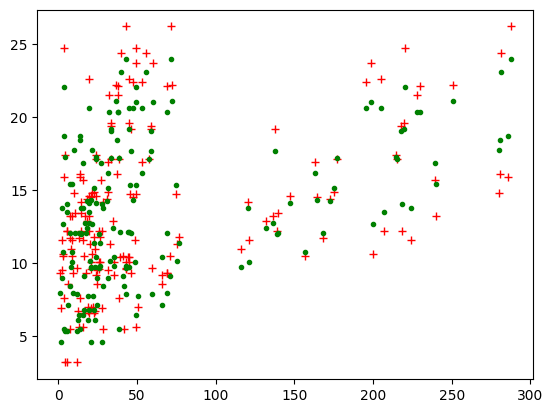

In [34]:
plt.plot(X_test,y_test,'+',color = 'red')
plt.plot(X_test,pred_value,'.',color = 'green')
plt.show()